<a href="https://colab.research.google.com/github/farahenany/Dissertation/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


In [ ]:
% pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import kmodes
from kmodes.kprototypes import KPrototypes

In [ ]:
# set option to display all columns in data frame
pd.options.display.max_columns = None

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

 
customer_base = pd.read_csv("drive/MyDrive/Dissertation/Dissertation/customer_retail_bank/UK_final_data.csv")
print(customer_base)

        Numcust       TRB  Primary_cust  Digital_cust  CA_holders  \
0      0.070379 -0.243790      0.340697      0.252573   -0.270957   
1      0.177381 -0.199371      0.487501      0.381397   -0.270957   
2      0.070379 -0.243790      0.340697      0.252573   -0.270957   
3      0.070379 -0.243790      0.340697      0.252573   -0.270957   
4      0.070379 -0.243790      0.340697      0.252573   -0.270957   
...         ...       ...           ...           ...         ...   
55291 -0.143626 -0.322757     -0.246518     -0.262722   -0.058875   
55292 -0.304130 -0.396788     -0.246518     -0.262722   -0.217937   
55293  0.070379 -0.224048     -0.246518     -0.262722    0.153207   
55294 -0.143626 -0.322757     -0.246518     -0.262722   -0.058875   
55295 -0.036624 -0.273403     -0.246518     -0.262722    0.047166   

       Card_holders  Ins_holders  Inv_holders  Mort_holders   Revenue  \
0         -0.235752     2.060290    -0.321304     -0.251197 -0.245633   
1         -0.235752     2

# Clustering K-protoypes



In [ ]:
UK_customers = pd.read_csv("drive/MyDrive/Dissertation/Dissertation/customer_retail_bank/UK_mixed_scaled.csv")
print(UK_customers)

      Market Proposition      Primary       Tenure      Age  International CA  \
0         UK      Bronze      Primary  1 - 3 years  25 - 35       Domestic  N   
1         UK      Bronze      Primary  1 - 3 years  25 - 35       Domestic  N   
2         UK      Bronze      Primary  1 - 3 years  25 - 35       Domestic  N   
3         UK      Bronze      Primary  1 - 3 years  25 - 35       Domestic  N   
4         UK      Bronze      Primary  1 - 3 years  25 - 35       Domestic  N   
...      ...         ...          ...          ...      ...            ... ..   
55291     UK        Gold  Non primary  4 - 5 years  18 - 25  International  Y   
55292     UK        Gold  Non primary  4 - 5 years  18 - 25  International  Y   
55293     UK        Gold  Non primary  4 - 5 years  18 - 25  International  Y   
55294     UK        Gold  Non primary  4 - 5 years  18 - 25  International  Y   
55295     UK        Gold  Non primary  4 - 5 years  18 - 25  International  Y   

      Card Insurance Invest

In [ ]:
# data transfromation
# focus on silver group of customers

silver_customers= UK_customers[UK_customers['Proposition']== 'Silver']
silver_customers.drop('Numcust', axis=1, inplace=True)
silver_customers.drop('Proposition', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
silver_customers.drop('Market', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
silver_customers.dtypes

Primary           object
Tenure            object
Age               object
International     object
CA                object
Card              object
Insurance         object
Investment        object
Mortgage          object
NPS               object
Digital           object
TRB              float64
Revenue          float64
Primary_cust     float64
Digital_cust     float64
CA_holders       float64
Card_holders     float64
Ins_holders      float64
Inv_holders      float64
Mort_holders     float64
dtype: object

In [ ]:
Cat_Columns_Pos = [silver_customers.columns.get_loc(col) for col in list(silver_customers.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(silver_customers.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(Cat_Columns_Pos))

Categorical columns           : ['Primary', 'Tenure', 'Age', 'International', 'CA', 'Card', 'Insurance', 'Investment', 'Mortgage', 'NPS', 'Digital']
Categorical columns position  : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# Convert dataframe to matrix for required structure
silver_customers_Matrix = silver_customers.to_numpy()
silver_customers_Matrix

array([['Primary', '1 - 3 years', '25 - 35', ..., 2.0602896896772207,
        -0.3213039946743193, -0.2511974201703177],
       ['Primary', '1 - 3 years', '25 - 35', ..., 2.0602896896772207,
        -0.3213039946743193, -0.2511974201703177],
       ['Primary', '1 - 3 years', '25 - 35', ..., 2.0602896896772207,
        -0.3213039946743193, -0.2511974201703177],
       ...,
       ['Non primary', '4 - 5 years', '18 - 25', ...,
        -0.5047231393607409, 14.48566535639078, 7.310043853630895],
       ['Non primary', '4 - 5 years', '18 - 25', ...,
        -0.5047231393607409, 11.79348911074258, 5.935272712939764],
       ['Non primary', '4 - 5 years', '18 - 25', ...,
        -0.5047231393607409, 15.83175347921488, 7.99742942397646]],
      dtype=object)

In [ ]:
ad = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = 1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(silver_customers_Matrix, categorical = Cat_Columns_Pos)
        ad.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [ ]:
# Converting the results into a dataframe and plotting them
a = {'Cluster': range(1, 8), 'WSSE': ad}
df = pd.DataFrame.from_dict(a, orient='index')
df_ad = df.transpose()
print(df_ad)

   Cluster           WSSE
0      1.0  792548.723345
1      2.0  446088.874370
2      3.0  311229.792835
3      4.0  278452.171459
4      5.0  250171.577387
5      6.0  232029.869122
6      7.0  209612.210213
7      NaN  195626.580381
8      NaN  183992.318468


In [ ]:
import pandas as pd
import numpy as np
import os
import plotnine
from kmodes.kprototypes import KPrototypes
from plotnine import *

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_label : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


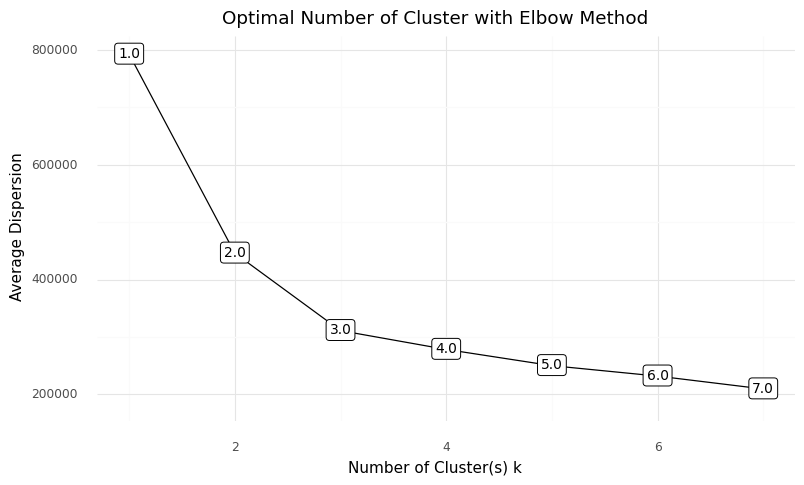

<ggplot: (8730283910585)>

In [ ]:
# Data viz
plotnine.options.figure_size = (9, 5)
(
    ggplot(data = df_ad)+
    geom_line(aes(x = 'Cluster',
                  y = 'WSSE'))+
    geom_point(aes(x = 'Cluster',
                   y = 'WSSE'))+
    geom_label(aes(x = 'Cluster',
                   y = 'WSSE',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal Number of Cluster with Elbow Method')+
    xlab('Number of Cluster(s) k')+
    ylab('Average Dispersion')+
    theme_minimal()
)

In [ ]:
kprototype = KPrototypes(n_jobs = 1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(silver_customers_Matrix, categorical = Cat_Columns_Pos)

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [ ]:
# Cluster centorid
kprototype.cluster_centroids_


array([['0.055977951443018835', '-0.13150732608546342',
        '0.07212138080828302', '0.09887205794164691',
        '0.03671642508637318', '0.023449428335696455',
        '0.8396783678480967', '0.37646306078717817',
        '-0.03475647459308339', 'Non primary', '4 - 5 years', '45 - 55',
        'Domestic', 'N', 'N', 'Y', 'Y', 'N', 'Detractor',
        'Not digitally active'],
       ['4.61680240430216', '2.6819230363200566', '3.5032221298837105',
        '3.0962021881559654', '5.140083663233863', '2.6752970801408864',
        '-0.5047231393607465', '13.416273125480524', '6.763954206078596',
        'Primary', '1 - 3 years', '25 - 35', 'Domestic', 'Y', 'Y', 'N',
        'Y', 'Y', 'Detractor', 'Not digitally active'],
       ['4.465122755948024', '2.692367390085264', '3.666419573854368',
        '3.099539208310709', '4.844231228672878', '2.9109136671897256',
        '-0.5047231393607475', '-0.32130399467425036',
        '3.9419259385399728', 'Primary', '>5 years', '25 - 35',
        '

In [ ]:
# Check the iteration of the clusters created
kprototype.n_iter_


4

In [ ]:
# Check the cost of the clusters created
kprototype.cost_

311229.7928352342

In [ ]:
# Add the cluster to the dataframe
silver_customers['Cluster Labels'] = kprototype.labels_
silver_customers['Segment'] = silver_customers['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
silver_customers['Segment'] = silver_customers['Segment'].astype('category')
silver_customers['Segment'] = silver_customers['Segment'].cat.reorder_categories(['First','Second','Third'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
silver_customers.dtypes

Primary             object
Tenure              object
Age                 object
International       object
CA                  object
Card                object
Insurance           object
Investment          object
Mortgage            object
NPS                 object
Digital             object
TRB                float64
Revenue            float64
Primary_cust       float64
Digital_cust       float64
CA_holders         float64
Card_holders       float64
Ins_holders        float64
Inv_holders        float64
Mort_holders       float64
Cluster Labels      uint16
Segment           category
dtype: object

In [ ]:
silver_customers['Cluster Labels'].sum()

5004

In [ ]:
silver_customers['Cluster Labels'].value_counts()

0    15354
2     1926
1     1152
Name: Cluster Labels, dtype: int64

In [ ]:
silver_customers['Segment'].value_counts()

First     15354
Third      1926
Second     1152
Name: Segment, dtype: int64

In [ ]:
# Cluster interpretation
silver_customers.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
silver_customers.groupby('Segment').agg(
    {
        'Total':'count',
        'Primary': lambda x: x.value_counts().index[0],
        'Tenure': lambda x: x.value_counts().index[0],
        'Age': lambda x: x.value_counts().index[0],
        'International': lambda x: x.value_counts().index[0],
        'CA': lambda x: x.value_counts().index[0],
        'Card': lambda x: x.value_counts().index[0],
        'Insurance': lambda x: x.value_counts().index[0],
        'Investment': lambda x: x.value_counts().index[0],
        'Mortgage': lambda x: x.value_counts().index[0],
        'NPS': lambda x: x.value_counts().index[0],
        'Digital': lambda x: x.value_counts().index[0],
        'TRB': 'mean',
        'Revenue': 'mean',
        'Primary_cust': 'mean',
        'Digital_cust': 'mean',
        'CA_holders': 'mean',
        'Card_holders': 'mean',
        'Ins_holders':  'mean',
        'Inv_holders':  'mean',
        'Mort_holders':  'mean'
    }
).reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Segment,Total,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders
0,First,15354,Non primary,4 - 5 years,45 - 55,Domestic,N,N,Y,Y,N,Detractor,Not digitally active,0.055978,-0.131507,0.072121,0.098872,0.036716,0.023449,0.839678,0.376463,-0.034756
1,Second,1152,Primary,1 - 3 years,25 - 35,Domestic,Y,N,N,Y,Y,Promoter,Digitally active,4.616802,2.681923,3.503222,3.096202,5.140084,2.675297,-0.504723,13.416273,6.763954
2,Third,1926,Primary,>5 years,25 - 35,International,Y,Y,N,N,Y,Passive,Digitally active,4.465123,2.692367,3.666420,3.099539,4.844231,2.910914,-0.504723,-0.321304,3.941926


In [ ]:
silver_customers.dtypes

Primary             object
Tenure              object
Age                 object
International       object
CA                  object
Card                object
Insurance           object
Investment          object
Mortgage            object
NPS                 object
Digital             object
TRB                float64
Revenue            float64
Primary_cust       float64
Digital_cust       float64
CA_holders         float64
Card_holders       float64
Ins_holders        float64
Inv_holders        float64
Mort_holders       float64
Cluster Labels      uint16
Segment           category
dtype: object

# BIRCH Clustering (failed model)



In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import Birch


In [ ]:
# reading in all numeric data set
birch_customers = pd.read_csv("drive/MyDrive/Dissertation/Dissertation/customer_retail_bank/UKdata.csv")
print(birch_customers)

        Numcust       TRB   Revenue  Primary_cust  Digital_cust  CA_holders  \
0      0.070379 -0.243790 -0.245633      0.340697      0.252573   -0.270957   
1      0.177381 -0.199371 -0.204336      0.487501      0.381397   -0.270957   
2      0.070379 -0.243790 -0.245633      0.340697      0.252573   -0.270957   
3      0.070379 -0.243790 -0.245633      0.340697      0.252573   -0.270957   
4      0.070379 -0.243790 -0.245633      0.340697      0.252573   -0.270957   
...         ...       ...       ...           ...           ...         ...   
55291 -0.143626 -0.322757  0.139805     -0.246518     -0.262722   -0.058875   
55292 -0.304130 -0.396788 -0.273165     -0.246518     -0.262722   -0.217937   
55293  0.070379 -0.224048  0.690431     -0.246518     -0.262722    0.153207   
55294 -0.143626 -0.322757  0.139805     -0.246518     -0.262722   -0.058875   
55295 -0.036624 -0.273403  0.415118     -0.246518     -0.262722    0.047166   

       Card_holders  Ins_holders  Inv_holders  Mort

In [ ]:
model = Birch(branching_factor = 50, n_clusters = 4, threshold = 1.5)


In [ ]:
birch_customers.shape

(55296, 22)

In [ ]:
model.fit(birch_customers)

Birch(n_clusters=4, threshold=1.5)

In [ ]:
pred = model.predict(birch_customers)

In [ ]:
print(pred.sum())

55296


No handles with labels found to put in legend.


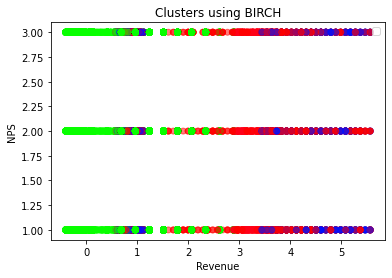

In [ ]:
plt.scatter(birch_customers['Revenue'], birch_customers['NPS'], c = pred,cmap='hsv', alpha=0.5)
plt.title("Clusters using BIRCH")
plt.xlabel("Revenue")
plt.ylabel("NPS")
plt.legend()

In [ ]:
columns=birch_customers.columns

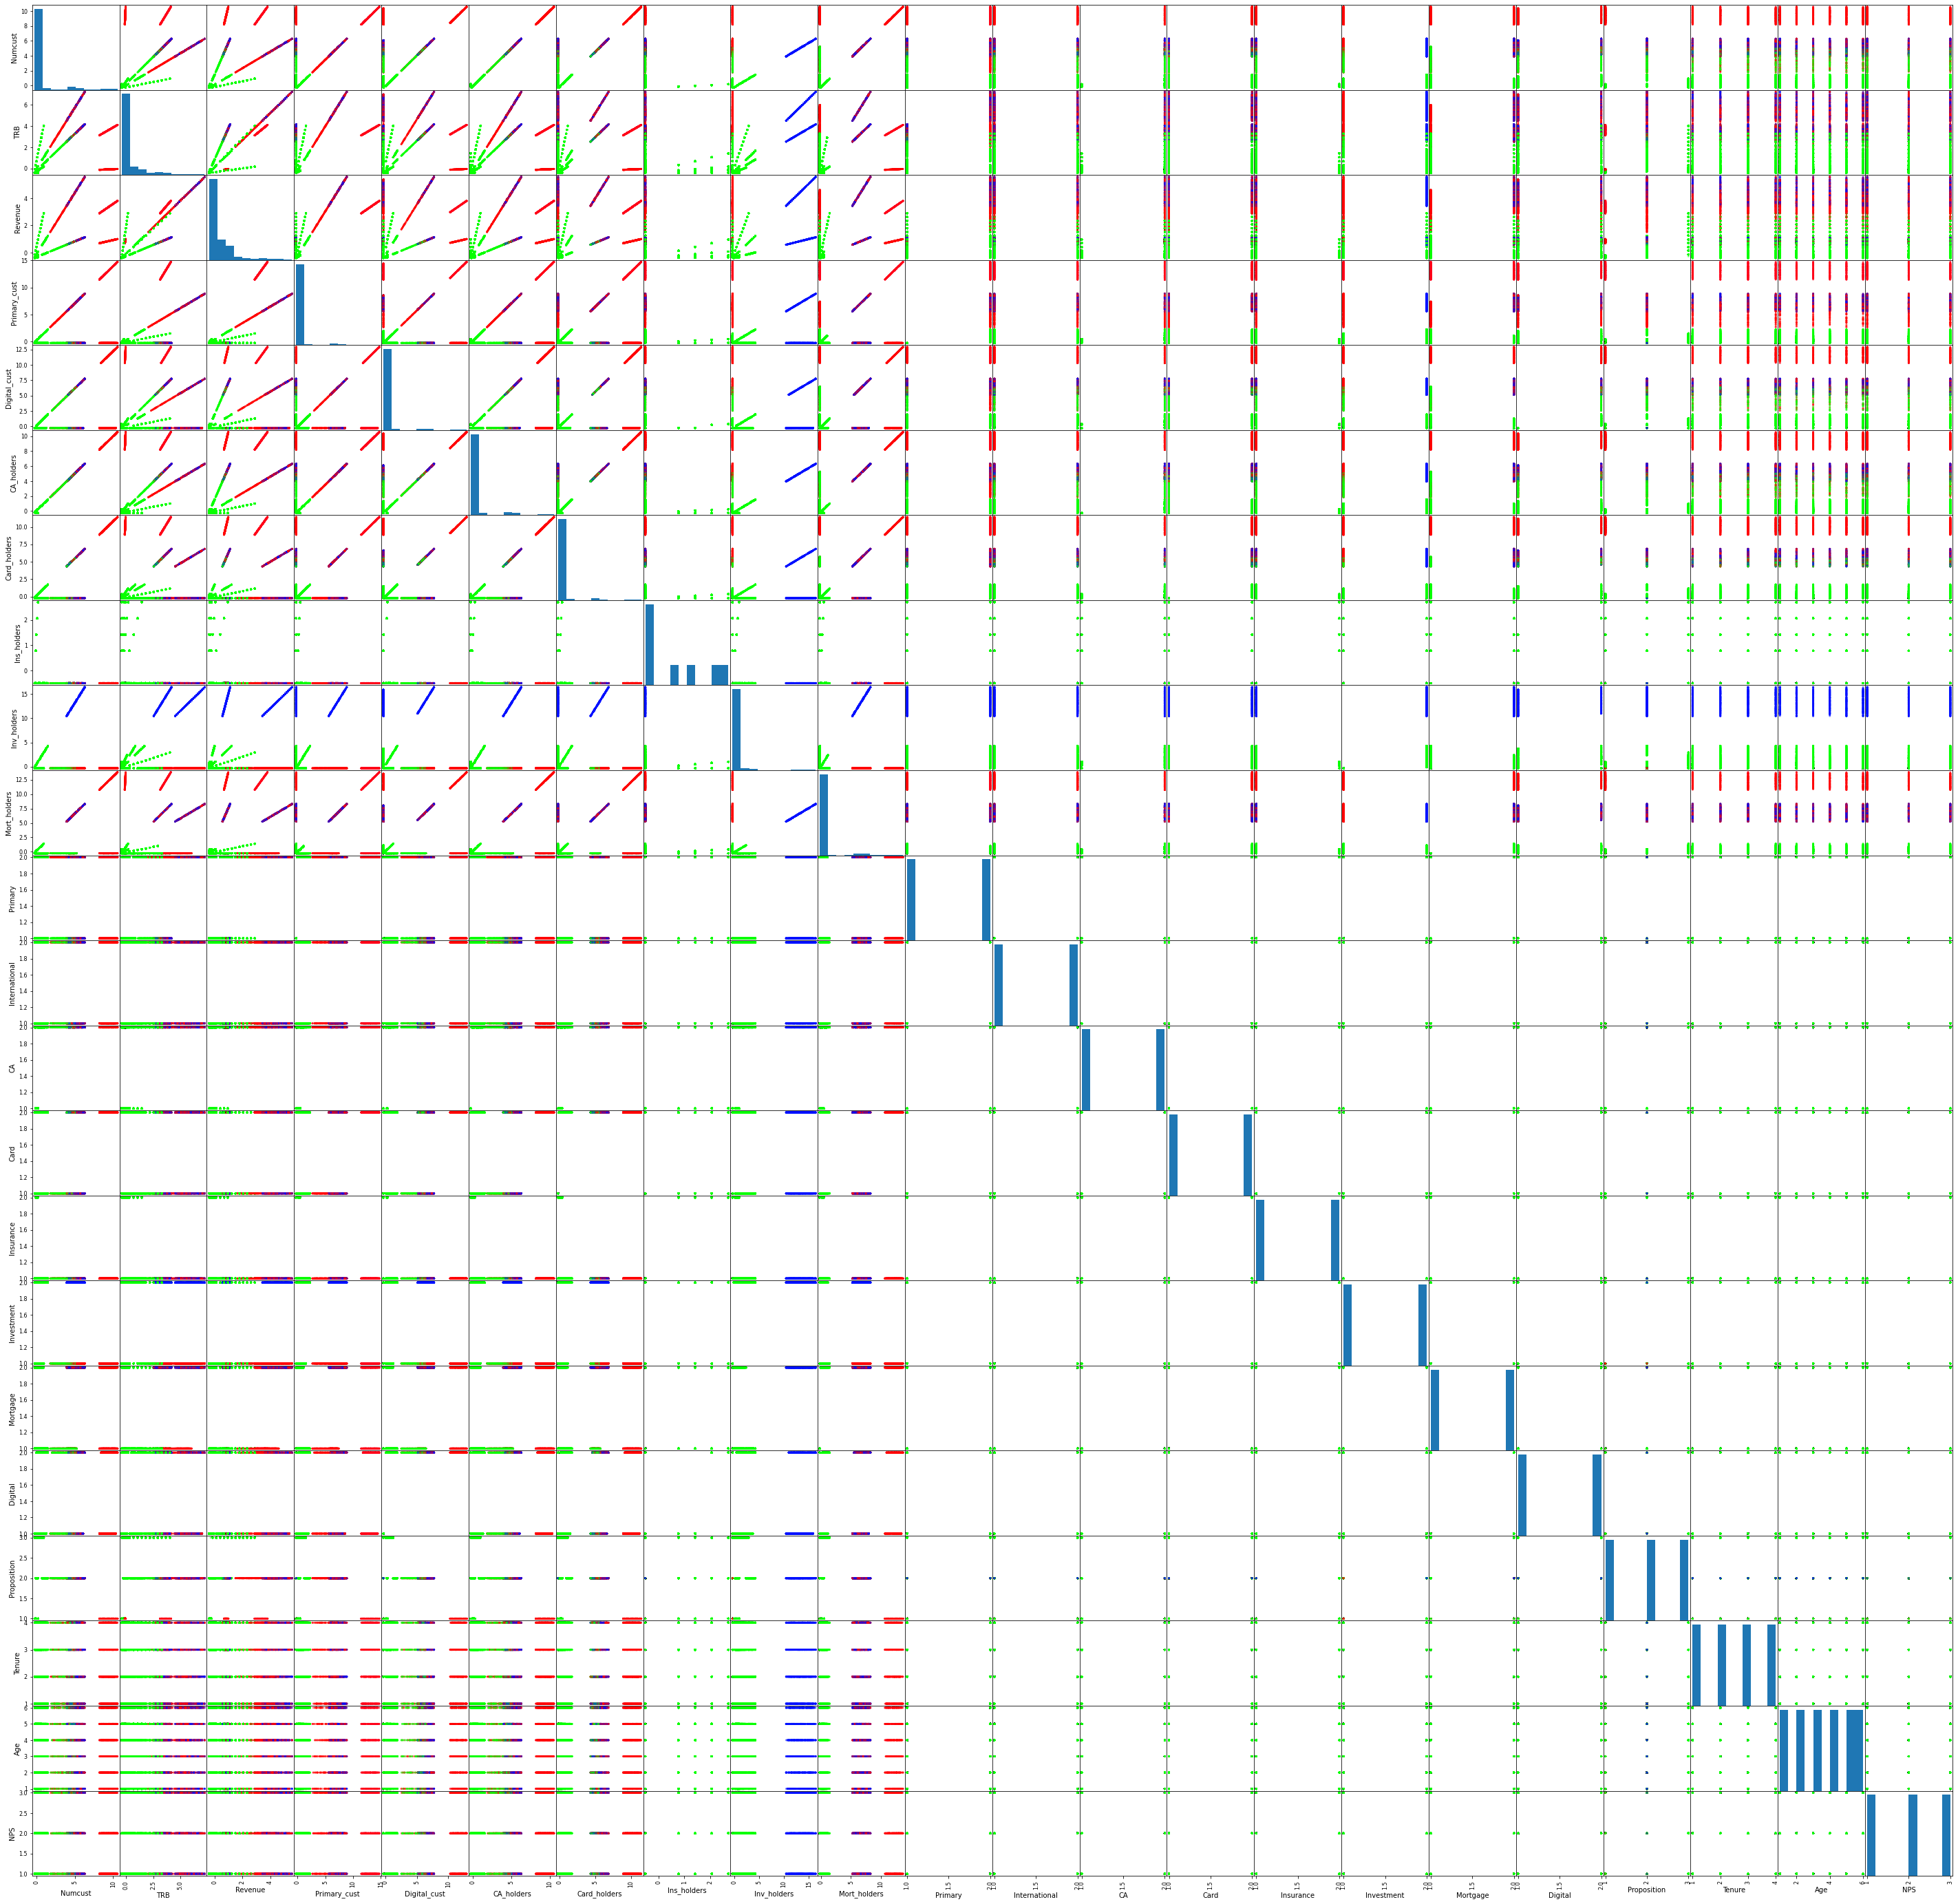

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(birch_customers[columns],figsize=(50,50),c = pred,cmap='hsv', alpha=0.5);

# K-means Clustering

In [ ]:
# importing k-mean
from sklearn.cluster import KMeans

# k value assigned to 3
kmeans = KMeans(n_clusters=3, random_state=0) 

# fitting the values
kmeans.fit(birch_customers)

# Cluster centers
kmeans.cluster_centers_

array([[ 1.12047184e-01,  9.81726508e-02,  1.35179756e-01,
         6.21010044e-02,  7.15910995e-02, -5.50244204e-03,
        -7.46437519e-03,  7.04779564e-01,  2.56721310e-01,
         6.73422477e-03,  1.49719430e+00,  1.50005845e+00,
         1.46130465e+00,  1.48484140e+00,  1.53869535e+00,
         1.51624971e+00,  1.48376978e+00,  1.49781779e+00,
         2.02244564e+00,  2.49980516e+00,  3.49929857e+00,
         1.99992206e+00],
       [ 5.10246140e+00,  4.61680240e+00,  2.68192304e+00,
         3.50322213e+00,  3.09620219e+00,  5.14008366e+00,
         2.67529708e+00, -5.04723139e-01,  1.34162731e+01,
         6.76395421e+00,  1.50000000e+00,  1.50000000e+00,
         2.00000000e+00,  1.50000000e+00,  1.00000000e+00,
         2.00000000e+00,  2.00000000e+00,  1.50000000e+00,
         2.00000000e+00,  2.50000000e+00,  3.50000000e+00,
         2.00000000e+00],
       [ 6.75214425e+00,  3.47124152e+00,  2.54203024e+00,
         4.94611820e+00,  4.31043187e+00,  6.77494645e+00,
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


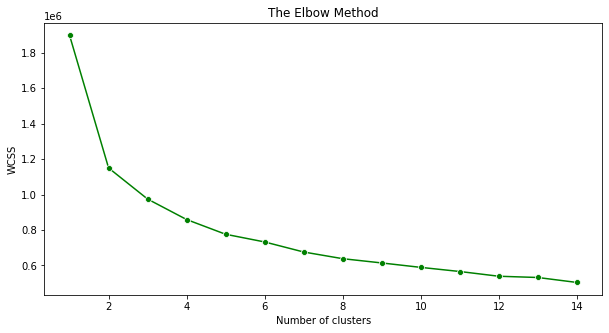

In [ ]:
from sklearn.cluster import KMeans

# to store WCSS
wcss = []

# for loop 
for i in range(1, 15):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(birch_customers)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
# importing the matplotlib module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

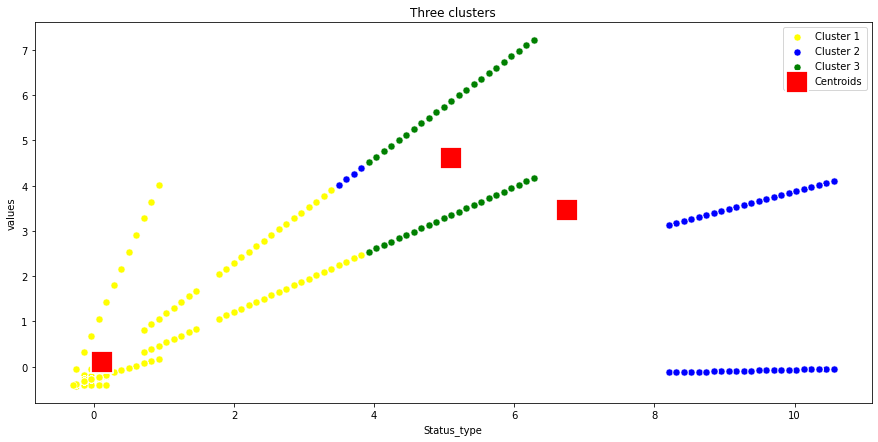

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42,init = 'k-means++')
y_kmeans = kmeans.fit_predict(birch_customers)
X = np.array(birch_customers)
birch_customers['Age'], birch_customers['Ins_holders']


# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
# sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'purple', label = 'Cluster 4',s=50)
# sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=500,marker=',')

# labeling
plt.grid(False)
plt.title('Three clusters')
plt.xlabel('Status_type')
plt.ylabel('values')
plt.legend()
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 1.12047184e-01,  9.81726508e-02,  1.35179756e-01,
         6.21010044e-02,  7.15910995e-02, -5.50244204e-03,
        -7.46437519e-03,  7.04779564e-01,  2.56721310e-01,
         6.73422477e-03,  1.49719430e+00,  1.50005845e+00,
         1.46130465e+00,  1.48484140e+00,  1.53869535e+00,
         1.51624971e+00,  1.48376978e+00,  1.49781779e+00,
         2.02244564e+00,  2.49980516e+00,  3.49929857e+00,
         1.99992206e+00],
       [ 6.75214425e+00,  3.47124152e+00,  2.54203024e+00,
         4.94611820e+00,  4.31043187e+00,  6.77494645e+00,
         6.06609539e+00, -5.04723139e-01, -3.21303995e-01,
         5.03187257e+00,  1.55106383e+00,  1.49893617e+00,
         2.00000000e+00,  1.77588652e+00,  1.00000000e+00,
         1.00000000e+00,  1.59113475e+00,  1.53971631e+00,
         1.59148936e+00,  2.50354610e+00,  3.51276596e+00,
         2.00141844e+00],
       [ 5.10246140e+00,  4.61680240e+00,  2.68192304e+00,
         3.50322213e+00,  3.09620219e+00,  5.14008366e+00,
    

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42,init = 'k-means++')
y_kmeans = kmeans.fit_predict(birch_customers)

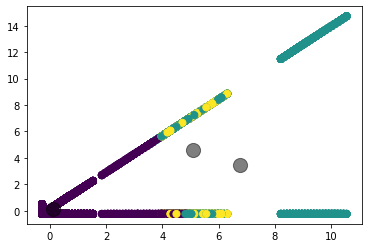

In [ ]:
plt.scatter(X[:, 5], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
